In [45]:
import yaml
from pymongo import MongoClient
import time
from datetime import datetime,timedelta
import pandas as pd
import numpy as np
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import re
import unicodedata
from unidecode import unidecode

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap

In [10]:
#plt.figure(figsize=(8, 8))
#m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
#m.bluemarble(scale=0.5);

In [11]:
client = MongoClient()
db = client['capstone']
coll=db['ff_stores']

In [12]:
df = pd.DataFrame(list(coll.find({}).limit(5000)))

In [13]:
len(df)

5000

In [14]:
coords = df['full_data'].apply(lambda x: -1 if x['geo'] == None else x['geo']['coordinates'])

In [15]:
coords = np.array(coords)

In [16]:
df['coords']=coords

In [17]:
df['long']=df['coords'].apply(lambda x: None if x == -1 else x[0])
df['lat']=df['coords'].apply(lambda x: None if x == -1 else x[1])

In [18]:
df[['coords','long','lat']].head()

,coords,long,lat
0,-1,NaN,NaN
1,-1,NaN,NaN
2,-1,NaN,NaN
3,-1,NaN,NaN
4,-1,NaN,NaN


In [19]:
c_dat = df[df['coords'] != -1]

In [20]:
c_dat.head()

,_id,full_data,keyword,sentiment,text,coords,long,lat
32,5c9b30f7aaedff5572f7cfd2,{'created_at': 'Wed Mar 27 07:56:53 +0000 2019...,mcdonald's,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","جووووي🤣🤪 (@ Mcdonald's in Al Hufūf, Eastern) h...","[25.39172985, 49.56133054]",25.391730,49.561331
72,5c9b30f7aaedff5572f7cffa,{'created_at': 'Wed Mar 27 07:38:34 +0000 2019...,mcdonald's,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",I'm at McDonald's &amp; McCafé - @mcthai in Ba...,"[13.72313059, 100.52966555]",13.723131,100.529666
87,5c9b30f7aaedff5572f7d009,{'created_at': 'Wed Mar 27 07:31:52 +0000 2019...,mcdonald's,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",'\nمايضيق صاحب البسمة الحلوه دامه صاحبي.. @ Mc...,"[24.58581389, 46.77801667]",24.585814,46.778017
111,5c9b30f8aaedff5572f7d021,{'created_at': 'Wed Mar 27 07:20:06 +0000 2019...,mcdonald's,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",I'm at McDonald's in Davao City https://t.co/G...,"[7.09828312, 125.61483004]",7.098283,125.614830
127,5c9b30f8aaedff5572f7d031,{'created_at': 'Wed Mar 27 07:13:14 +0000 2019...,mcdonald's,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","I'm at McDonald's in Kuwait, KUWAIT https://t....","[29.30173478, 47.90301974]",29.301735,47.903020


In [21]:
c_dat[['long','lat']].head()

,long,lat
32,25.391730,49.561331
72,13.723131,100.529666
87,24.585814,46.778017
111,7.098283,125.614830
127,29.301735,47.903020


In [22]:
len(c_dat)

94

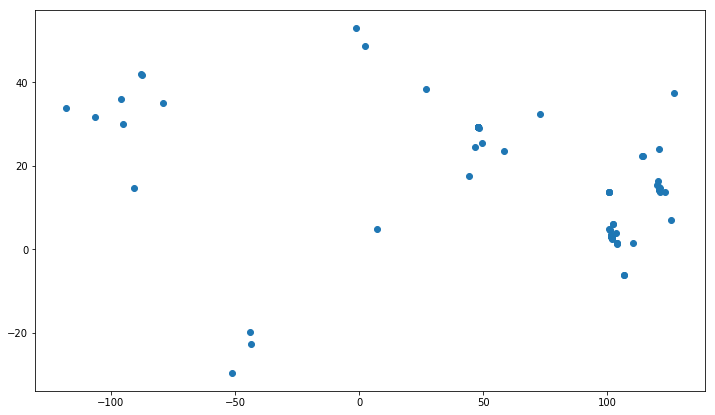

In [23]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.scatter(c_dat['lat'],c_dat['long'])

In [24]:
x = c_dat['full_data']
us_dat = c_dat[np.array([i['place']['country_code'] for i in x])=='US']

In [25]:
us_dat = us_dat[(us_dat['lat']>-130)&(us_dat['long']>22)]

In [26]:
us_col = np.where(us_dat['keyword']=="mcdonald's", 'b', 'y')

In [27]:
us_dat[us_col=='b']

,_id,full_data,keyword,sentiment,text,coords,long,lat
675,5c9b30feaaedff5572f7d255,{'created_at': 'Wed Mar 27 03:00:50 +0000 2019...,mcdonald's,"{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'comp...",Waiting on our dinner. At least it's not McDo...,"[33.877187, -118.21795]",33.877187,-118.217950
983,5c9b3103aaedff5572f7d389,{'created_at': 'Wed Mar 27 01:19:47 +0000 2019...,mcdonald's,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...","I'm at McDonald's in Chicago, IL https://t.co/...","[41.8835986, -87.6258091]",41.883599,-87.625809
1073,5c9b3104aaedff5572f7d3e3,{'created_at': 'Wed Mar 27 00:46:29 +0000 2019...,mcdonald's,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",#Chichan #Tone 2 #mood\n#Valle #Poser #Fake #d...,"[31.70018254, -106.33942634]",31.700183,-106.339426
2286,5c9b3113aaedff5572f7d8a0,{'created_at': 'Tue Mar 26 19:18:41 +0000 2019...,mcdonald's,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Here for a late lunch! (@ McDonald's in Chicag...,"[42.00715077, -87.69046558]",42.007151,-87.690466
2436,5c9b3114aaedff5572f7d936,{'created_at': 'Tue Mar 26 18:38:09 +0000 2019...,mcdonald's,"{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compou...","McDonald's, it ain't .. 👌 👍 #cigar #botl @eigh...","[36.0363, -95.7836]",36.036300,-95.783600
3711,5c9b3124aaedff5572f7de31,{'created_at': 'Tue Mar 26 13:31:58 +0000 2019...,mcdonald's,"{'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compou...","I'm at McDonald's in Kingwood, TX https://t.co...","[30.04899687, -95.18548645]",30.048997,-95.185486
4057,5c9b3127aaedff5572f7df8b,{'created_at': 'Tue Mar 26 12:06:33 +0000 2019...,mcdonald's,"{'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'comp...",Happy birthday silas_benny 🎂 🎈 #breakfastsquad...,"[34.98150504, -79.01295227]",34.981505,-79.012952


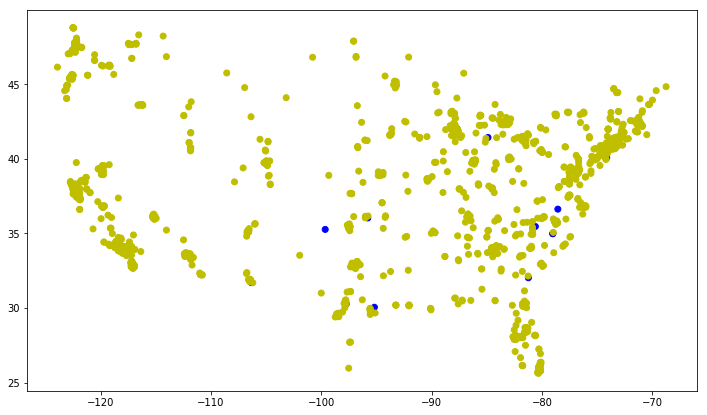

In [38]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.scatter(us_dat['lat'],us_dat['long'],c = us_col)

In [28]:
us_dat[['lat','long']].head()

,lat,long
675,-118.217950,33.877187
983,-87.625809,41.883599
1073,-106.339426,31.700183
2286,-87.690466,42.007151
2436,-95.783600,36.036300


In [37]:
us_dat['long']

675     33.877187
983     41.883599
1073    31.700183
2286    42.007151
2436    36.036300
3711    30.048997
4057    34.981505
Name: long, dtype: float64

In [30]:
eng_dat = c_dat[np.array([i['lang'] for i in x])=='en']
len(eng_dat)

60

In [32]:
eng_dat[['long','lat']].values[0:20]

array([[  25.39172985,   49.56133054],
       [  13.72313059,  100.52966555],
       [   7.09828312,  125.61483004],
       [  29.30173478,   47.90301974],
       [  29.24638668,   47.93582448],
       [   1.51162819,  110.30455948],
       [   3.0263725 ,  101.58160812],
       [  29.30173478,   47.90301974],
       [  14.650921  ,  -90.500191  ],
       [  13.62483062,  123.18585802],
       [  33.877187  , -118.21795   ],
       [ -19.85450013,  -43.96093369],
       [   1.35305036,  103.94496541],
       [   3.11939302,  101.59284034],
       [  41.8835986 ,  -87.6258091 ],
       [  22.249334  ,  114.148634  ],
       [   1.54365134,  103.76262077],
       [  31.70018254, -106.33942634],
       [  14.62378522,  121.00773681],
       [  29.31394979,   48.00429673]])

In [35]:
def get_census(coords):
    url='https://geo.fcc.gov/api/census/area?lat={}&lon={}&format=json'.format(coords[0],coords[1])
    res = requests.get(url)
    if res.json()['results']==[]:
        return None
    else:
        return res.json()['results'][0]['block_fips'][:-4]


census = []
for coords in us_dat[['long','lat']].values[:20]:
    census.append(get_census(coords))

In [38]:
census

['06037543202',
 '17031320100',
 '48141003901',
 '17031020302',
 '40143007503',
 '48201251000',
 '37051003201']

In [23]:
sub_eng = eng_dat[(eng_dat['lat']>-130) & (eng_dat['lat']<-25) & (eng_dat['long']>0)]
len(sub_eng)

1677

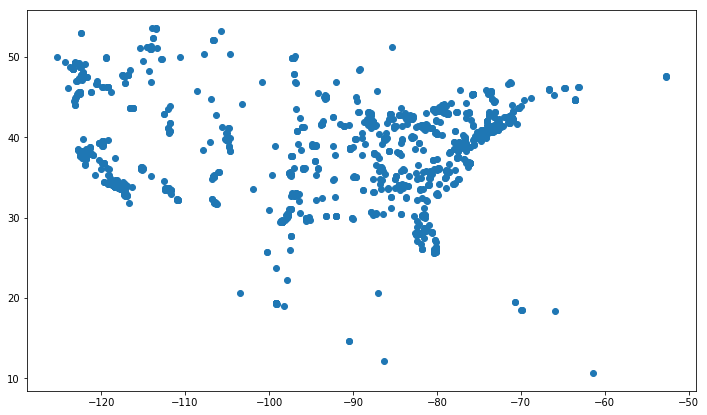

In [24]:
fig,ax = plt.subplots(1,1,figsize=(12,7))
ax.scatter(sub_eng['lat'],sub_eng['long'])

In [73]:
us_dat['text'].iloc[:20]

675     Waiting on our dinner.  At least it's not McDo...
983     I'm at McDonald's in Chicago, IL https://t.co/...
1073    #Chichan #Tone 2 #mood\n#Valle #Poser #Fake #d...
2286    Here for a late lunch! (@ McDonald's in Chicag...
2436    McDonald's, it ain't .. 👌 👍 #cigar #botl @eigh...
3711    I'm at McDonald's in Kingwood, TX https://t.co...
4057    Happy birthday silas_benny 🎂 🎈 #breakfastsquad...
5839    I'm at McDonald's in Kannapolis, NC https://t....
5919    Uncle @ochocinco meal plan. (@ McDonald's in S...
5948    Time to roll...#truckerjackie #5hrjunkie #5hou...
6297    I'm at McDonald's - @mcdnytristate in Brick, N...
6337    Bra i got to stop drinking 😂😂💀👀‼️ sound like a...
6782    Good morning, fatigue, I remember you fondly. ...
7221    JB, struggling this morning? Don’t miss breakf...
7448    I'm at McDonald's - @mcd_northernind in Butler...
7467    Tea time (@ McDonald's in Clarksville, VA) htt...
8857    @prosperitygirl1 Black girl magic. @ Starbucks...
8879    This d

In [77]:
result = us_dat['text'].apply(lambda x: re.sub(r"http\S+", "", x))

In [78]:
result

675       Waiting on our dinner.  At least it's not McDo...
983                       I'm at McDonald's in Chicago, IL 
1073      #Chichan #Tone 2 #mood\n#Valle #Poser #Fake #d...
2286      Here for a late lunch! (@ McDonald's in Chicag...
2436      McDonald's, it ain't .. 👌 👍 #cigar #botl @eigh...
3711                     I'm at McDonald's in Kingwood, TX 
4057      Happy birthday silas_benny 🎂 🎈 #breakfastsquad...
5839                  I'm at McDonald's in Kannapolis, NC  
5919      Uncle @ochocinco meal plan. (@ McDonald's in S...
5948      Time to roll...#truckerjackie #5hrjunkie #5hou...
6297       I'm at McDonald's - @mcdnytristate in Brick, NJ 
6337      Bra i got to stop drinking 😂😂💀👀‼️ sound like a...
6782      Good morning, fatigue, I remember you fondly. ...
7221      JB, struggling this morning? Don’t miss breakf...
7448      I'm at McDonald's - @mcd_northernind in Butler...
7467           Tea time (@ McDonald's in Clarksville, VA)  
8857        @prosperitygirl1 Black girl 

In [94]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores('hi you are awesome👌 👍')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [46]:
def deEmojify(inputString):
    returnString = ""
    for character in inputString:
        try:
         character.encode("ascii")
         returnString += character
        except UnicodeEncodeError:
         returnString += ''
    return returnString

In [57]:
deEmojify('what upstop drinking 😂😂💀👀‼️ soa i got to stop drinking ‼️ sound like a big.')

'what upstop drinking  soa i got to stop drinking  sound like a big.'

In [58]:
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)

def strip_emoji(text):
    return RE_EMOJI.sub(r'', text)

strip_emoji('what up🙄🤔hellstop drinking 😂😂💀👀‼️ soo')

'what uphellstop drinking ‼️ soo'

In [55]:
res = us_dat['text'].apply(lambda x: deEmojify(x))

In [56]:
res

675     Waiting on our dinner.  At least it's not McDo...
983     I'm at McDonald's in Chicago, IL https://t.co/...
1073    #Chichan #Tone 2 #mood\n#Valle #Poser #Fake #d...
2286    Here for a late lunch! (@ McDonald's in Chicag...
2436    McDonald's, it ain't ..   #cigar #botl @eighty...
3711    I'm at McDonald's in Kingwood, TX https://t.co...
4057    Happy birthday silas_benny   #breakfastsquad @...
Name: text, dtype: object

In [54]:
us_dat['sentiment'].values

array([{'neg': 0.181, 'neu': 0.819, 'pos': 0.0, 'compound': -0.4356},
       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
       {'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.4767},
       {'neg': 0.0, 'neu': 0.65, 'pos': 0.35, 'compound': 0.4995},
       {'neg': 0.0, 'neu': 0.575, 'pos': 0.425, 'compound': 0.5719}],
      dtype=object)

In [123]:
import preprocessor as p

def preprocessing_text(text):
    '''
    INPUT: str
    OUTPUT: str w/ emojies, urls, hashtags and mentions removed
    '''
    p.set_options(p.OPT.EMOJI, p.OPT.URL)
    clean_text = p.clean(text)
    
    return clean_text 